In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from yellowbrick.features.pca import PCADecomposition

C:\Users\moumi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [4]:
Prcpt=pd.read_csv(r'C:\Users\moumi\Desktop\Busniess Analytucs\Sem 2\Marketing analysis 5007\airlinePrcpt.csv')

In [5]:
Prcpt

,Features,Convenience,Punctuality,Service,Quality
0,American,5,6,8,6
1,United,8,5,7,6
2,USAirways,3,5,5,4
3,Continental,3,4,4,4
4,Southwest,3,8,6,3


In [6]:
Prcpt_mean = Prcpt.groupby(['Features'],as_index = False).mean()

In [7]:
Prcpt_mean

,Features,Convenience,Punctuality,Service,Quality
0,American,5,6,8,6
1,Continental,3,4,4,4
2,Southwest,3,8,6,3
3,USAirways,3,5,5,4
4,United,8,5,7,6


In [44]:
percept = Prcpt_mean.drop(columns = ['Features'])

In [45]:
percept = pd.DataFrame(preprocessing.normalize(percept), columns=percept.columns)

In [46]:
percept = percept.join(Prcpt_mean['Features'])
percept['Features']= label_encoder.fit_transform(percept['Features'])

In [49]:
X = percept.drop(columns = ['Features'])
y = percept['Features']
labels = Prcpt['Features']

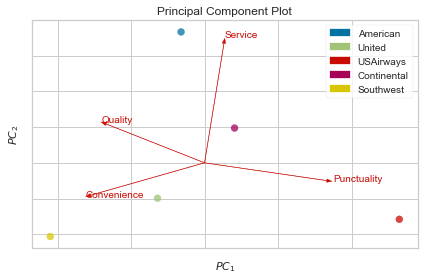

In [50]:
visualizer = PCADecomposition(scale=True, proj_features = True,  classes = labels)
visualizer.fit_transform(X, y)
visualizer.show()

In [24]:
Pref=pd.read_csv(r'C:\Users\moumi\Desktop\Busniess Analytucs\Sem 2\Marketing analysis 5007\airlinePref.csv')

In [25]:
Pref

,Respondent,Resp01,Resp02,Resp03,Resp04,Resp05,Resp06,Resp07,Resp08,Resp09,...,Resp21,Resp22,Resp23,Resp24,Resp25,Resp26,Resp27,Resp28,Resp29,Resp30
0,American,4,5,6,7,6,5,4,5,6,...,5,4,6,7,6,5,4,5,6,7
1,United,3,4,5,4,3,9,8,9,8,...,3,5,4,3,3,9,8,9,8,8
2,USAirways,2,3,4,3,2,3,4,5,4,...,2,3,5,3,2,3,4,5,4,2
3,Continental,5,3,4,2,3,5,6,4,3,...,5,3,4,2,3,5,6,4,4,2
4,Southwest,9,8,9,8,5,6,5,6,5,...,9,8,9,8,5,6,6,6,5,4


In [29]:
Pref_mean= Pref.groupby(['Respondent'],as_index = False).mean()

In [30]:
Preferential = Pref_mean.drop(columns = ['Respondent'])

In [31]:
Preferential = pd.DataFrame(preprocessing.normalize(Preferential), columns=Preferential.columns)

In [32]:
Preferential =Preferential.join(Pref_mean['Respondent'])
Preferential['Respondent']= label_encoder.fit_transform(Preferential['Respondent'])

In [52]:
X1 = Preferential.drop(columns = ['Respondent'])
y1 = Preferential['Respondent']
labels = Pref['Respondent']

In [53]:
y1

0    0
1    1
2    2
3    3
4    4
Name: Respondent, dtype: int32

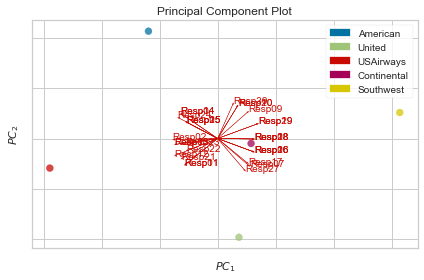

In [55]:
visualizer = PCADecomposition(scale=True, proj_features = True, color = None,figsize=(22, 10), classes= labels)
visualizer.fit_transform(X1, y1)
visualizer.show(figsize=(22, 10))